In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv('/content/drive/MyDrive/My colabs/DataSet_Titanic.csv')
df.head()

,Survivor,Class,Gender,Age,Horizontal ties,Vertical ties
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [36]:
X = df.drop('Survivor', axis=1)
y = df['Survivor']

In [37]:
X.head()

,Class,Gender,Age,Horizontal ties,Vertical ties
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [38]:
y.head()

,Survivor
0,0
1,1
2,1
3,1
4,0


In [39]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree1.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [40]:
pred_y = tree1.predict(X)
print('Accuracy: ', accuracy_score(pred_y, y))

Accuracy:  0.8151260504201681


In [41]:
confusion_matrix(y, pred_y)

array([[372,  52],
       [ 80, 210]])

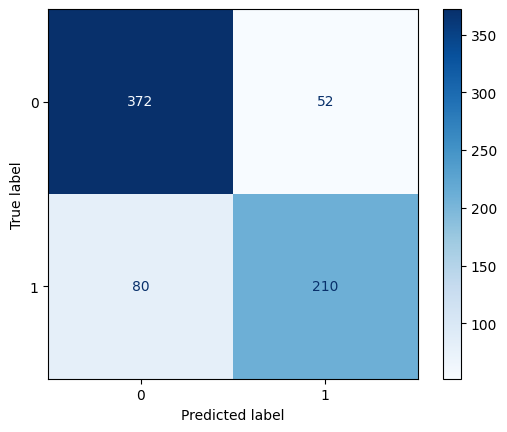

In [42]:
ConfusionMatrixDisplay.from_estimator(tree1, X, y, cmap=plt.cm.Blues, values_format='.0f')

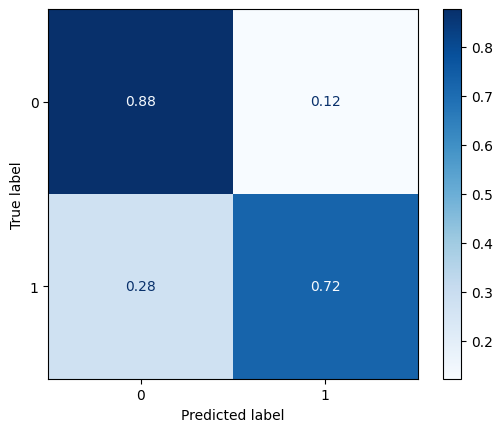

In [43]:
ConfusionMatrixDisplay.from_estimator(tree1, X, y, cmap=plt.cm.Blues, values_format='.2f', normalize='true')

<function matplotlib.pyplot.show(close=None, block=None)>

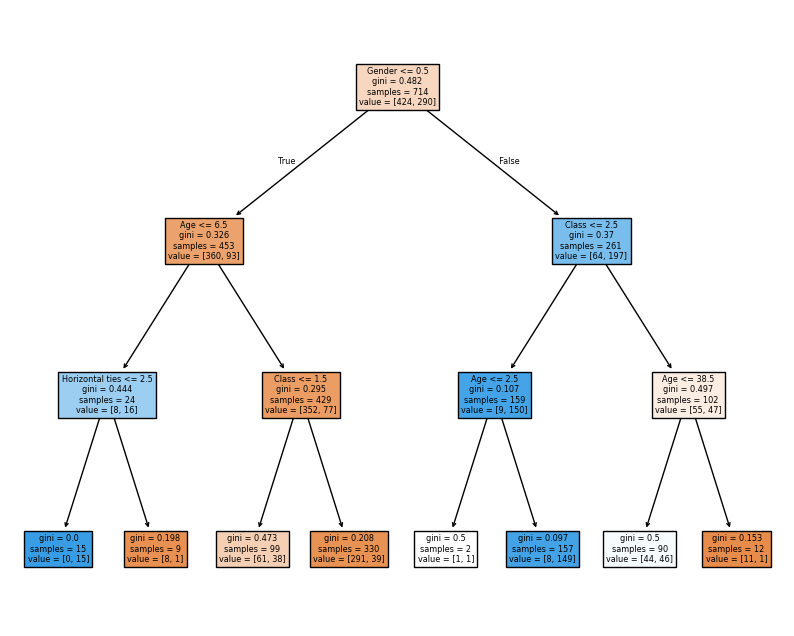

In [44]:
plt.figure(figsize= (10, 8))
tree.plot_tree(tree1, feature_names=X.columns, filled=True)
plt.show

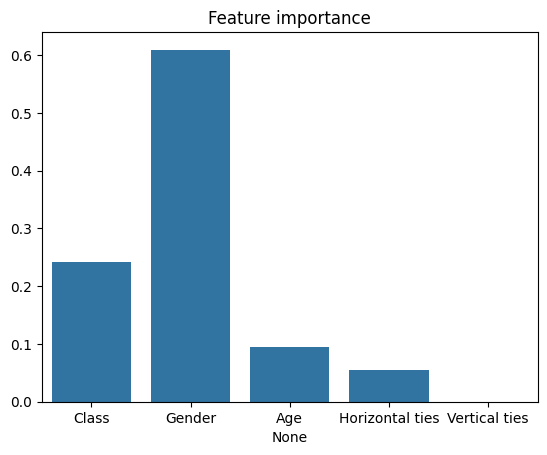

In [45]:
importances = tree1.feature_importances_
columns = X.columns

sns.barplot(x=columns, y=importances)
plt.title('Feature importance')
plt.show()